In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data = pd.read_csv("/Users/hafiz/Downloads/Datascience_Memorize/heart_disease_uci.csv")
Data['prescence'] = Data['num'].apply(lambda x: 1 if x > 0 else 0)
Data['chol_bins'] = pd.cut(Data['chol'], bins=5)
grouped = Data.groupby(['chol_bins', 'sex', 'prescence']).size().reset_index(name='count')
Data.head()

/var/folders/nm/krj_c4h97_z44c4jdx7pjk240000gn/T/ipykernel_11788/367743568.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = Data.groupby(['chol_bins', 'sex', 'prescence']).size().reset_index(name='count')


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num,prescence,chol_bins
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0,0,"(120.6, 241.2]"
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2,1,"(241.2, 361.8]"
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1,1,"(120.6, 241.2]"
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0,0,"(241.2, 361.8]"
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0,0,"(120.6, 241.2]"


In [3]:
amt_women = len(Data[Data['sex'] == 'Female'])
amt_men = len(Data[Data['sex'] == 'Male'])
print(f"The amount of men and women in the survey is Men: {amt_men} and Women: {amt_women}")

The amount of men and women in the survey is Men: 726 and Women: 194


Text(0.5, 1.0, 'The proportion of each age group and Heart Disease')

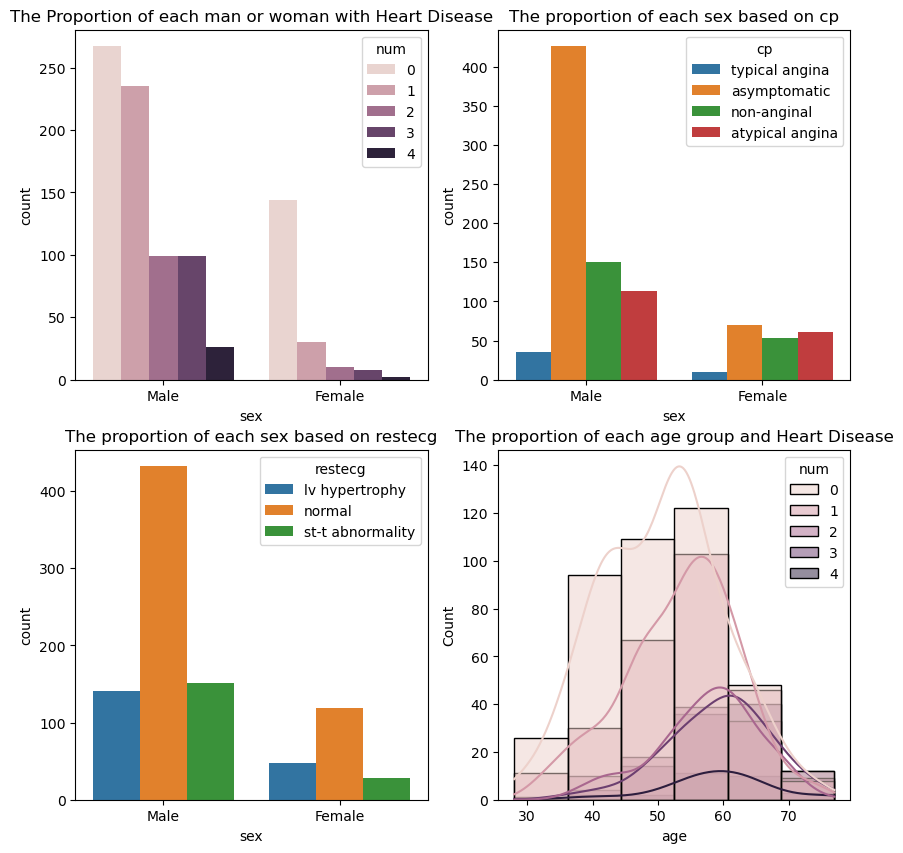

In [4]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.countplot(data=Data, x='sex', hue='num', ax=ax[0,0])
ax[0,0].set_title('The Proportion of each man or woman with Heart Disease')

sns.countplot(data=Data, x='sex', hue='cp', ax=ax[0,1])
ax[0,1].set_title('The proportion of each sex based on cp')

sns.countplot(data=Data, x='sex', hue='restecg', ax=ax[1,0])
ax[1,0].set_title('The proportion of each sex based on restecg')

sns.histplot(data=Data, x='age', hue='num', bins=6, kde=True, ax=ax[1,1])
ax[1,1].set_title('The proportion of each age group and Heart Disease')

Text(0.5, 1.0, 'Heart Disease prescence for each chest pain')

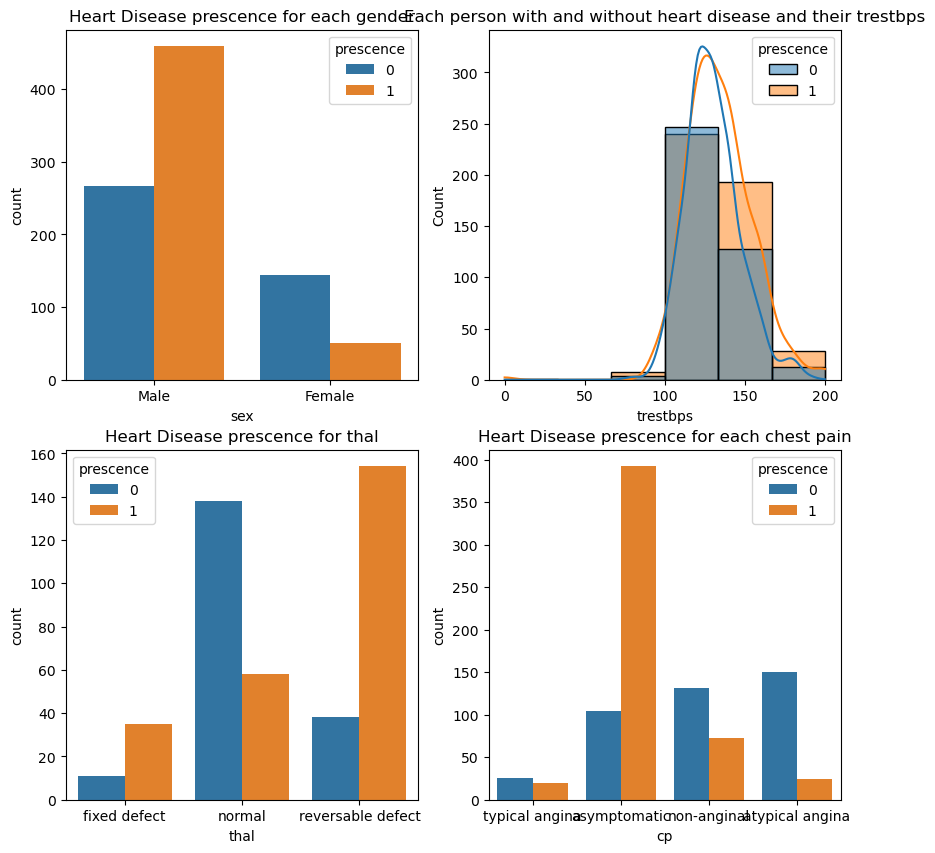

In [5]:
fig, ax = plt.subplots(2,2, figsize=(10,10))

sns.countplot(data=Data, x='sex', hue='prescence', ax=ax[0,0])
ax[0,0].set_title("Heart Disease prescence for each gender")

sns.histplot(data=Data, x='trestbps', hue='prescence', bins=6, kde=True, ax=ax[0,1])
ax[0,1].set_title("Each person with and without heart disease and their trestbps")

sns.countplot(data=Data, x='thal', hue='prescence', ax=ax[1,0])
ax[1,0].set_title("Heart Disease prescence for thal")

sns.countplot(data=Data, x='cp', hue='prescence', ax=ax[1,1])
ax[1,1].set_title("Heart Disease prescence for each chest pain")

603.0


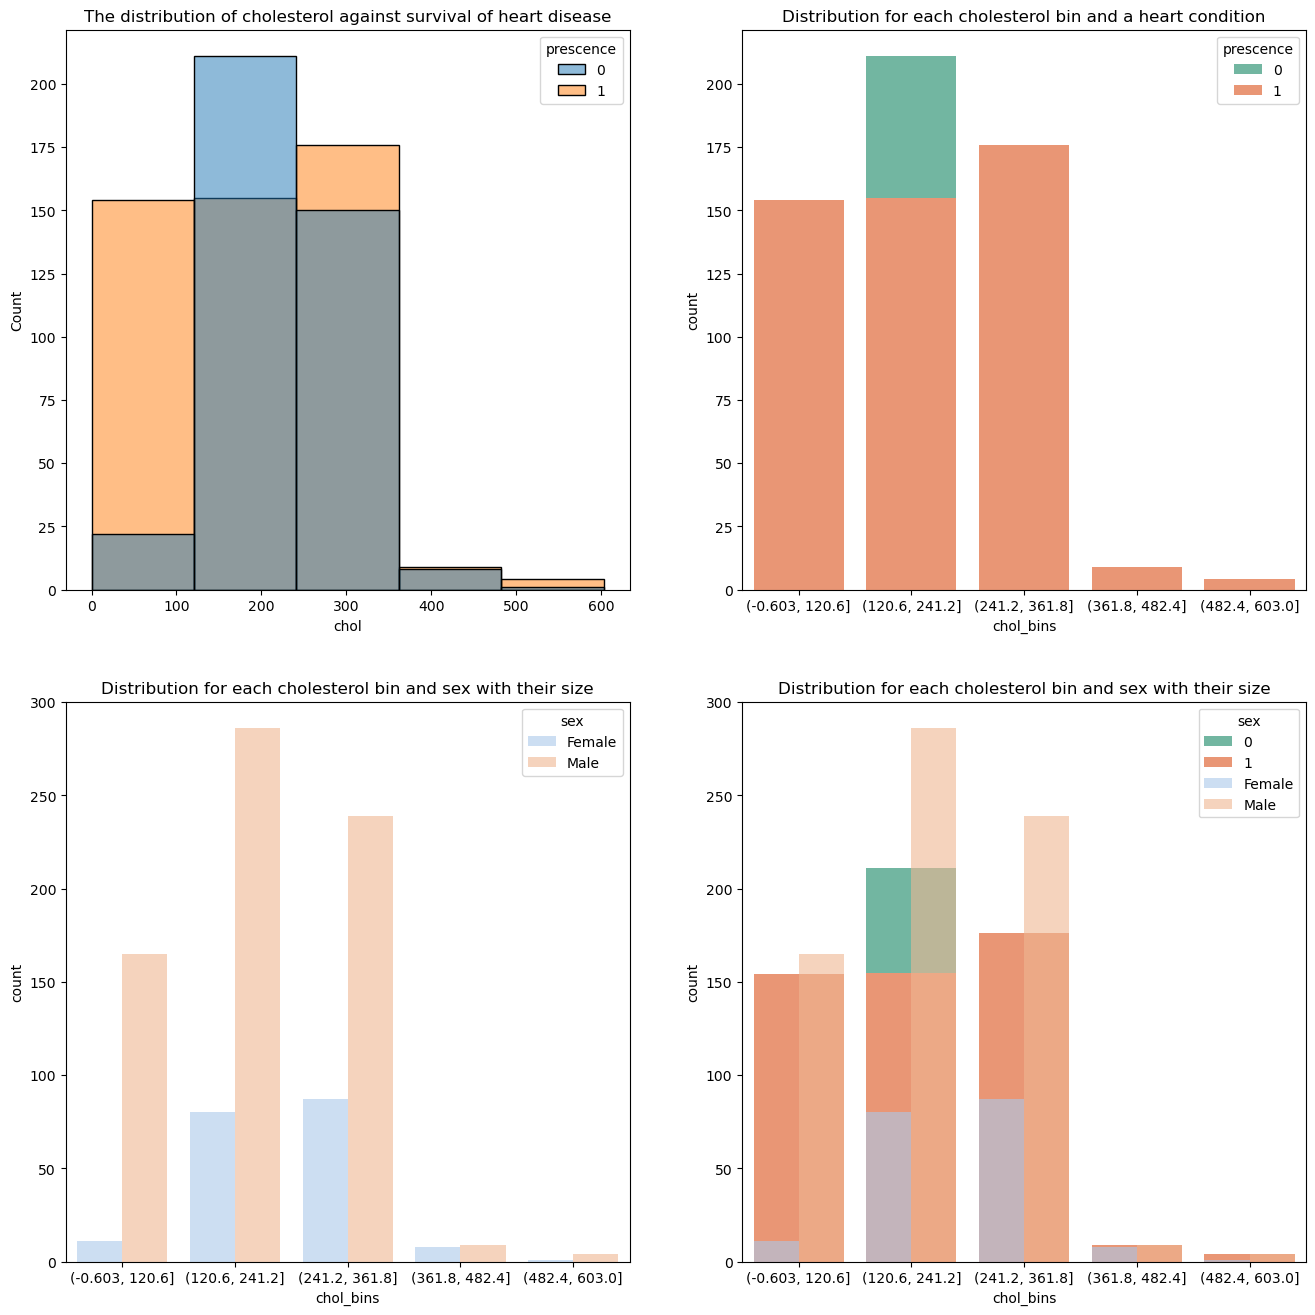

In [6]:
fig, ax = plt.subplots(2,2, figsize=(16,16))

sns.histplot(data=Data, x='chol', hue='prescence', bins=5, ax=ax[0,0])
ax[0,0].set_title("The distribution of cholesterol against survival of heart disease")

sns.barplot(data=grouped, x='chol_bins', y='count', hue='prescence', palette='Set2', errorbar=None, dodge=False, estimator='sum', ax=ax[0,1])
ax[0,1].set_title("Distribution for each cholesterol bin and a heart condition")

sns.barplot(data=grouped, x='chol_bins', y='count', hue='sex', palette='pastel', errorbar=None, dodge=True, estimator='sum', alpha=0.6, ax=ax[1,0])
ax[1,0].set_title("Distribution for each cholesterol bin and sex with their size")

                  ####
sns.barplot(data=grouped, x='chol_bins', y='count', hue='prescence', palette='Set2', errorbar=None, dodge=False, estimator='sum', ax=ax[1,1])
ax[1,1].set_title("Distribution for each cholesterol bin and a heart condition")

sns.barplot(data=grouped, x='chol_bins', y='count', hue='sex', palette='pastel', errorbar=None, dodge=True, estimator='sum', alpha=0.6, ax=ax[1,1])
ax[1,1].set_title("Distribution for each cholesterol bin and sex with their size")

print(max(Data["chol"]))